In [3]:
import requests

In [4]:
start_url = 'https://wh.fang.lianjia.com/loupan/pg5/?_t=1'
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36 Edg/107.0.1418.26'}

In [5]:
# 发送GET请求
res = requests.get(start_url,headers = headers)

In [6]:
# 获取状态码
res.status_code

200

In [7]:
res_json=res.json()
res_json

{'errno': 0,
 'error': '',
 'data': {'no_more_data': 0,
  'switch_city': [],
  'list': [{'item_type': '0',
    'item_type_desc': '',
    'pid': '16196',
    'id': '3711064004946',
    'city_id': '420100',
    'city_name': '武汉市',
    'cover_pic': 'https://image1.ljcdn.com/hdic-resblock/f787b46e-7add-4bbc-992a-4ce38d25eb10.jpg',
    'min_frame_area': '189',
    'max_frame_area': '349',
    'district_name': '江夏',
    'district': '江夏',
    'district_id': '420115',
    'bizcircle_id': '1100004000',
    'bizcircle_name': '文化大道',
    'build_id': '3711064004946',
    'permit_all_ready': '1',
    'process_status': '3',
    'resblock_frame_area': '建面 189-349㎡',
    'resblock_frame_area_range': '189-349㎡',
    'resblock_frame_area_desc': '建面',
    'decoration': '毛坯',
    'longitude': '114.34018482003',
    'latitude': '30.416423399101',
    'frame_rooms_desc': '3/4/5居',
    'title': '中建汤逊湖壹号',
    'resblock_name': '中建汤逊湖壹号',
    'resblock_alias': '中建汤逊湖壹号别墅',
    'address': '文化大道汤逊湖红旗岛中建汤逊湖壹号',
 

#### 楼盘名称

In [6]:
[i['title'] for i in res_json['data']['list']]

['汉口1872',
 '大华锦绣前城',
 '方岛金茂智慧科学城',
 '中建锦绣双城',
 '云尚武汉国际时尚中心',
 '楚天都市沁园',
 '临空香廷',
 '越秀汉阳星汇云锦',
 '北辰孔雀城航天府',
 '电建地产洺悦御府']

#### 区域

In [7]:
[i['district_name'] for i in res_json['data']['list']]

['硚口', '青山', '汉阳', '蔡甸', '硚口', '洪山', '黄陂', '汉阳', '新洲', '东西湖']

#### 单价

In [8]:
[i['average_price'] for i in res_json['data']['list']]

['24800',
 '21500',
 '20000',
 '9200',
 '35000',
 '0',
 '11400',
 '25000',
 '6600',
 '13000']

### 面积

In [9]:
[i['resblock_frame_area_range'] for i in res_json['data']['list']]

['80-137㎡',
 '89-143㎡',
 '108-181㎡',
 '108-160㎡',
 '50-168㎡',
 '',
 '114-163㎡',
 '125-280㎡',
 '90-130㎡',
 '97-131㎡']

#### 子页面链接部分

In [11]:
project_name = [i['project_name'] for i in res_json['data']['list']]

In [12]:
fb_expo_id = [i['fb_expo_id'] for i in res_json['data']['list']]

#### 获取主页面数据(楼盘、区域、单价、面积)以及子页面链接部分

In [10]:
title_all = [i['title'] for i in res_json['data']['list']]  # 楼盘名
district_name = [i['district_name'] for i in res_json['data']['list']]  # 区域
average_price = [i['average_price'] for i in res_json['data']['list']]  # 单价
project_name = [i['project_name'] for i in res_json['data']['list']]  # 子页面链接的 project_name
fb_expo_id = [i['fb_expo_id'] for i in res_json['data']['list']]  # 子页面链接的 fb_expo_id
frame_area = []
for i in res_json['data']['list']:
    area = i['resblock_frame_area_range']  # 建面
    if area == '':  # 判断建面是否为空
        area = '建面待定';
    frame_area.extend([area])  # 拼接建面
    
print(title_all)
print(district_name)
print(average_price)
print(frame_area)

['汉口1872', '大华锦绣前城', '方岛金茂智慧科学城', '中建锦绣双城', '云尚武汉国际时尚中心', '楚天都市沁园', '临空香廷', '越秀汉阳星汇云锦', '北辰孔雀城航天府', '电建地产洺悦御府']
['硚口', '青山', '汉阳', '蔡甸', '硚口', '洪山', '黄陂', '汉阳', '新洲', '东西湖']
['24800', '21500', '20000', '9200', '35000', '0', '11400', '25000', '6600', '13000']
['80-137㎡', '89-143㎡', '108-181㎡', '108-160㎡', '50-168㎡', '建面待定', '114-163㎡', '125-280㎡', '90-130㎡', '97-131㎡']


#### 使用selenium的webdriver模块

In [2]:
from selenium import webdriver  # 导入webdriver模块
import time  # 导入内置的time库
driver = webdriver.Edge()  # 创建Edge浏览器对象
driver.get('https://wh.fang.lianjia.com/loupan/pg1')
time.sleep(4)  # 等待4秒钟
driver.quit() # 退出浏览器

#### 子页面时间

In [20]:
from lxml import etree
from selenium import webdriver
import requests
from selenium.webdriver.common.by import By
import time
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36 Edg/107.0.1418.26'}
time_all = []  # 定义时间列表
for j in range(len(project_name)):  # 获取开盘时间的部分
    inside_url = f'https://wh.fang.lianjia.com/loupan/p_{project_name[j]}/?fb_expo_id={fb_expo_id[j]}'
    res = requests.get(inside_url, headers=headers)
    try:
        html = etree.HTML(res.text)  # 如果访问页面需要人机验证或者没有取到时间都可能引发异常
        time_a = html.xpath('//div[@class="open-date"]/span[@class="content"]/text()')[0].replace('.', '-')  # 获取开盘时间
    except:
        driver = webdriver.Edge()  # 如果异常则打开浏览器
        driver.get(inside_url)  # 获取url进入链家页面
        time.sleep(15)  # 休息15秒
        try:
            time_a = driver.find_element(By.XPATH, '//div[@class="open-date"]/span[@class="content"]').text.replace('.', '-')
        except:
            time_a = '时间待定'  # 如果取不到元素则改为时间待定
    if len(time_a) > 7:
        time_a = time_a[:-3]
    time_all.extend([time_a])  # 拼接时间
print(time_all)

['2021-03', '2021-10', '2021-04', '2022-08', '2018-11', '2018-10', '2019-08', '2021-04', '2019-12', '2019-11']


### 数据解析完整代码

In [ ]:
import time
from selenium import webdriver
import pymysql
import requests
from selenium.webdriver.common.by import By
from lxml import etree

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36 Edg/107.0.1418.35'}

pages = 101

def home_page():
    global res_json, time_a

    for page in range(1, pages):
        frame_area = []  # 面积
        time_all = []  # 开盘时间

        print("==================现在开始爬取第" + str(page) + "页======================")
        print("----------------正在获取第" + str(page) + "页网址，请稍后-----------------")
        start_url = f'https://wh.fang.lianjia.com/loupan/pg{page}/?_t=1'
        print(start_url)
        res = requests.get(start_url, headers=headers)
        try:
            time.sleep(6)  # 等待6秒
            res_json = res.json()  # 可能需要人机验证
        except:
            driver = webdriver.Edge()  # 如果出错则打开浏览器
            driver.get(start_url[:-6])  # 获取网页url
            time.sleep(15)
            res = requests.get(start_url, headers=headers)
            res_json = res.json()  # 人机验证完成后再次转换成json格式
        
        title_all = [i['title'] for i in res_json['data']['list']]  # 楼盘名
        district_name = [i['district_name'] for i in res_json['data']['list']]  # 区域
        average_price = [i['average_price'] for i in res_json['data']['list']]  # 单价
        
        project_name = [i['project_name'] for i in res_json['data']['list']]  # 子页面链接的 project_name
        fb_expo_id = [i['fb_expo_id'] for i in res_json['data']['list']]  # 子页面链接的 fb_expo_id
        
        for i in res_json['data']['list']:  # 获取楼盘名、区域名、均价、面积的部分
            area = i['resblock_frame_area_range']  # 面积
            if area == '':
                area = '面积待定'

            name = i['project_name']
            id = i['fb_expo_id']
            print("--------------------正在拼接列表--------------------")
            frame_area.extend([area])  # 拼接面积

        for j in range(len(res_json['data']['list'])):  # 获取开盘时间的部分
            inside_url = f'https://wh.fang.lianjia.com/loupan/p_{project_name[j]}/?fb_expo_id={fb_expo_id[j]}'
            print('--------------------子页面链接如下-----------------------')
            print(inside_url)
            res = requests.get(inside_url, headers=headers)
            try:
                html = etree.HTML(res.text)  # 异常处理：可能需要人机验证
                time_a = html.xpath('//li/div[@class="open-date"]/span[@class="content"]/text()')[0].replace('.', '-')  # 获取开盘时间
                if len(time_a) > 7:
                    time_a = time_a[:-3]
            except:
                driver = webdriver.Edge()  # 如果异常则打开浏览器
                driver.get(inside_url)  # 获取url
                time.sleep(15)  # 休息15秒
                try:
                    time_a = driver.find_element(By.XPATH, '//li/div[@class="open-date"]/span[@class="content"]').text.replace('.', '-')  # 再次尝试
                    if len(time_a) > 7:
                        time_a = time_a[:-3]
                except:
                    time_a = '时间待定'  # 如果time_a没有取到值，则改为时间待定

            print(time_a)  # 输出时间
            time_all.extend([time_a])  # 拼接时间

        print(".....................楼盘基本信息如下........................")
        print(title_all)
        print(district_name)
        print(average_price)
        print(frame_area)
        print(time_all)
        print("=================第" + str(page) + "页完成！=====================")

        print("-------------导入第" + str(page) + "页数据到数据库---------------")
        # 定义数据库连接
        db = pymysql.connect(host="localhost",
                             port=3306,
                             database='loupan',
                             user="root",
                             password="123")
        # 创建游标
        cs = db.cursor()
        try:
            for i in range(len(title_all)):
                sql = "insert into loupan03 values(0,'{}','{}','{}','{}','{}')" \
                      ";".format(title_all[i], district_name[i], average_price[i], frame_area[i], time_all[i])
                cs.execute(sql)
                db.commit()  # 提交
            print("----------------导入完成------------------")
        except:
            print("-----------导入数据时出错，使用回滚-------------")
            db.rollback()
        finally:
            cs.close()  # 关闭游标
            db.close()  # 关闭数据库

if __name__ == '__main__':
    home_page()


==================现在开始爬取第4页======================
----------------正在获取第4页网址，请稍后-----------------
https://wh.fang.lianjia.com/loupan/pg4/?_t=1
--------------------正在拼接列表--------------------
--------------------正在拼接列表--------------------
--------------------正在拼接列表--------------------
--------------------正在拼接列表--------------------
--------------------正在拼接列表--------------------
--------------------正在拼接列表--------------------
--------------------正在拼接列表--------------------
--------------------正在拼接列表--------------------
--------------------正在拼接列表--------------------
--------------------正在拼接列表--------------------
--------------------子页面链接如下-----------------------
https://wh.fang.lianjia.com/loupan/p_bhmswaavez/?fb_expo_id=644234970931556382
2020-11
--------------------子页面链接如下-----------------------
https://wh.fang.lianjia.com/loupan/p_hxrceqaavhj/?fb_expo_id=644234970931556383
2019-07
--------------------子页面链接如下-----------------------
https://wh.fang.lianjia.com/loupan/p_qcxceqaavhq/?fb_expo_id

### 数据清洗

#### 从数据库中查询数据

In [71]:
import pymysql
# 定义数据库连接
db = pymysql.connect(host="localhost",
                     port=3306,
                     database='loupan',
                     user="root",
                     password="123")
# 创建游标
cs = db.cursor()
sql_1 = 'select district_name,avg(price_info) from loupan04 group by district_name'
sql_2 = 'select count(title_all), time_all from loupan04 where time_all != "时间待定" group by time_all order by time_all'
cs.execute(sql_1)
data_1 = cs.fetchall()  # 地区-均价信息查询结果存入data_1中
cs.execute(sql_2)
data_2 = cs.fetchall()  # 时间-楼盘开盘数查询结果存入data_2中

In [72]:
cs.close()
db.close()

#### 取出数据结果保存到列表中

In [73]:
list_1 = sorted(data_1, key = lambda item:item[1])  # 对价格排序
district = [i[0] for i in list_1]  # 地址
avg_price = [i[1] for i in list_1]  # 均价（已排序）
list_2 = sorted(data_2, key = lambda item:item[1])  # 对时间排序
title = [i[0] for i in data_2]  # 标题
time_all = [i[1] for i in data_2]  # 时间

In [74]:
print(time_all)

['2001-01', '2005-08', '2006-01', '2007-07', '2007-11', '2008-03', '2008-04', '2009-08', '2009-09', '2009-10', '2010-01', '2010-02', '2010-03', '2010-07', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-11', '2011-12', '2012-01', '2012-03', '2012-04', '2012-05', '2012-06', '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12', '2013-01', '2013-02', '2013-04', '2013-05', '2013-06', '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07'

### 数据可视化

#### 不同区域平均单价条形图

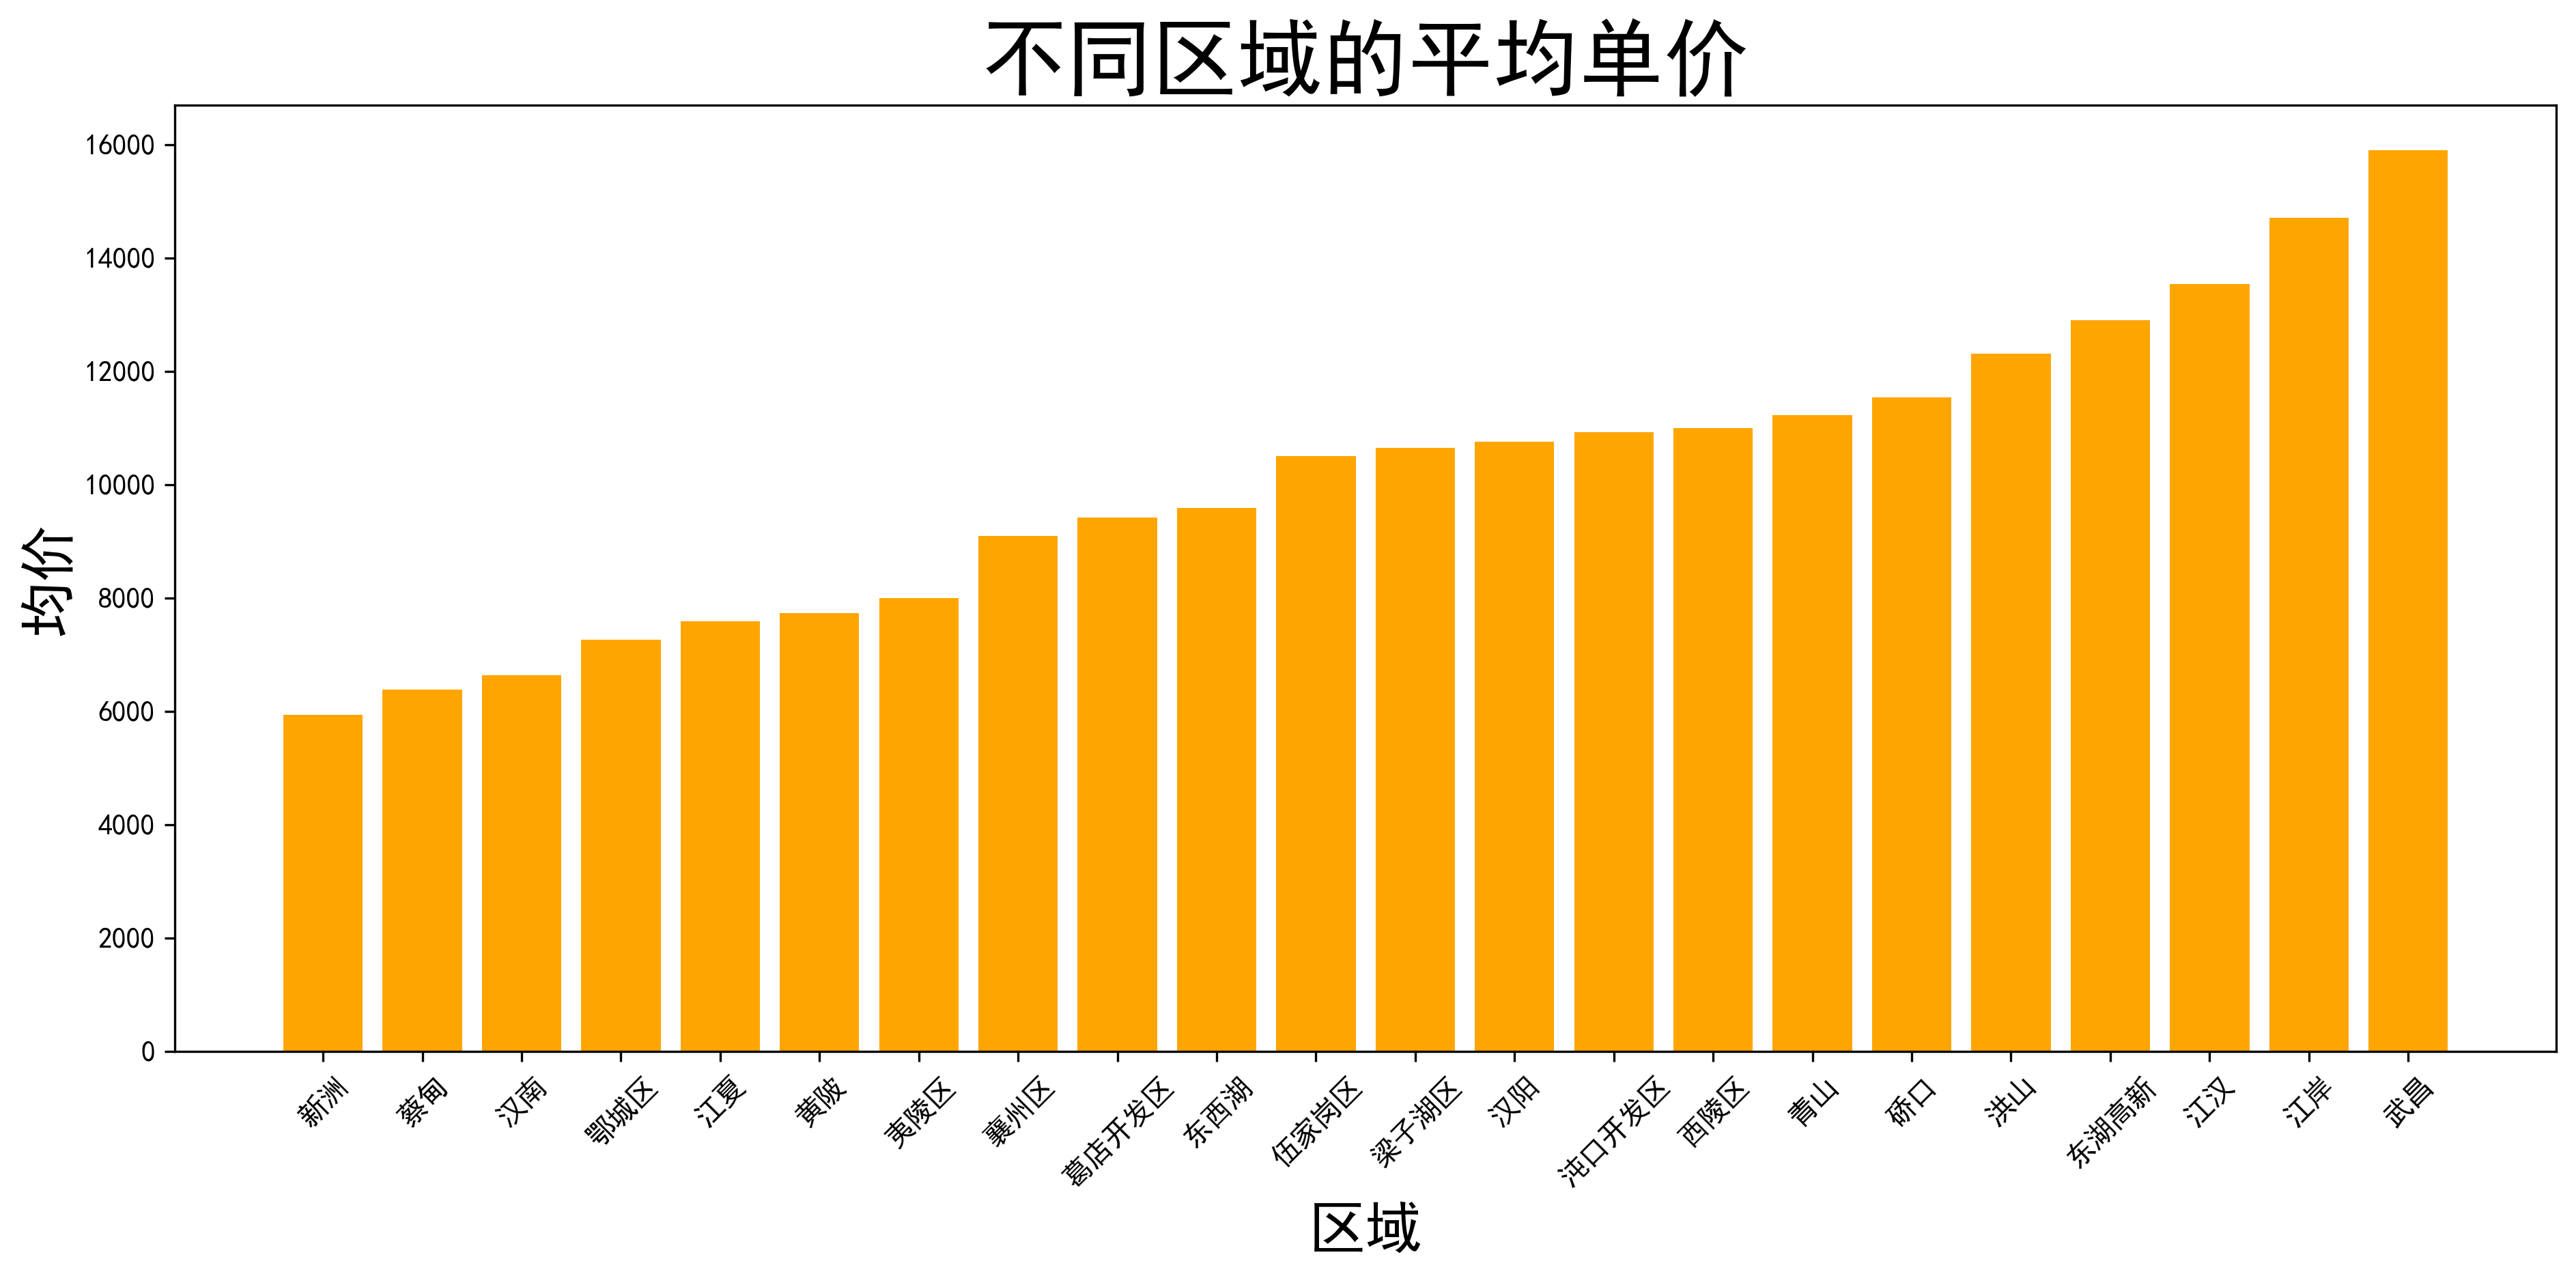

In [83]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使图形中的中文正常编码显示
plt.rcParams['axes.unicode_minus'] = False  #  使坐标轴刻度表签正常显示正负号
plt.figure(figsize = (15,6), dpi = 300)  # 定义画布
plt.xticks(rotation = 45)  # x轴属性，旋转45°
plt.xlabel("区域", fontsize=20)
plt.ylabel("均价", fontsize=20)
plt.title("不同区域的平均单价", fontsize=30)
plt.bar(range(len(district)), avg_price, tick_label = district, color = 'orange')
plt.show()

#### 不同时间的楼盘开盘数折线图

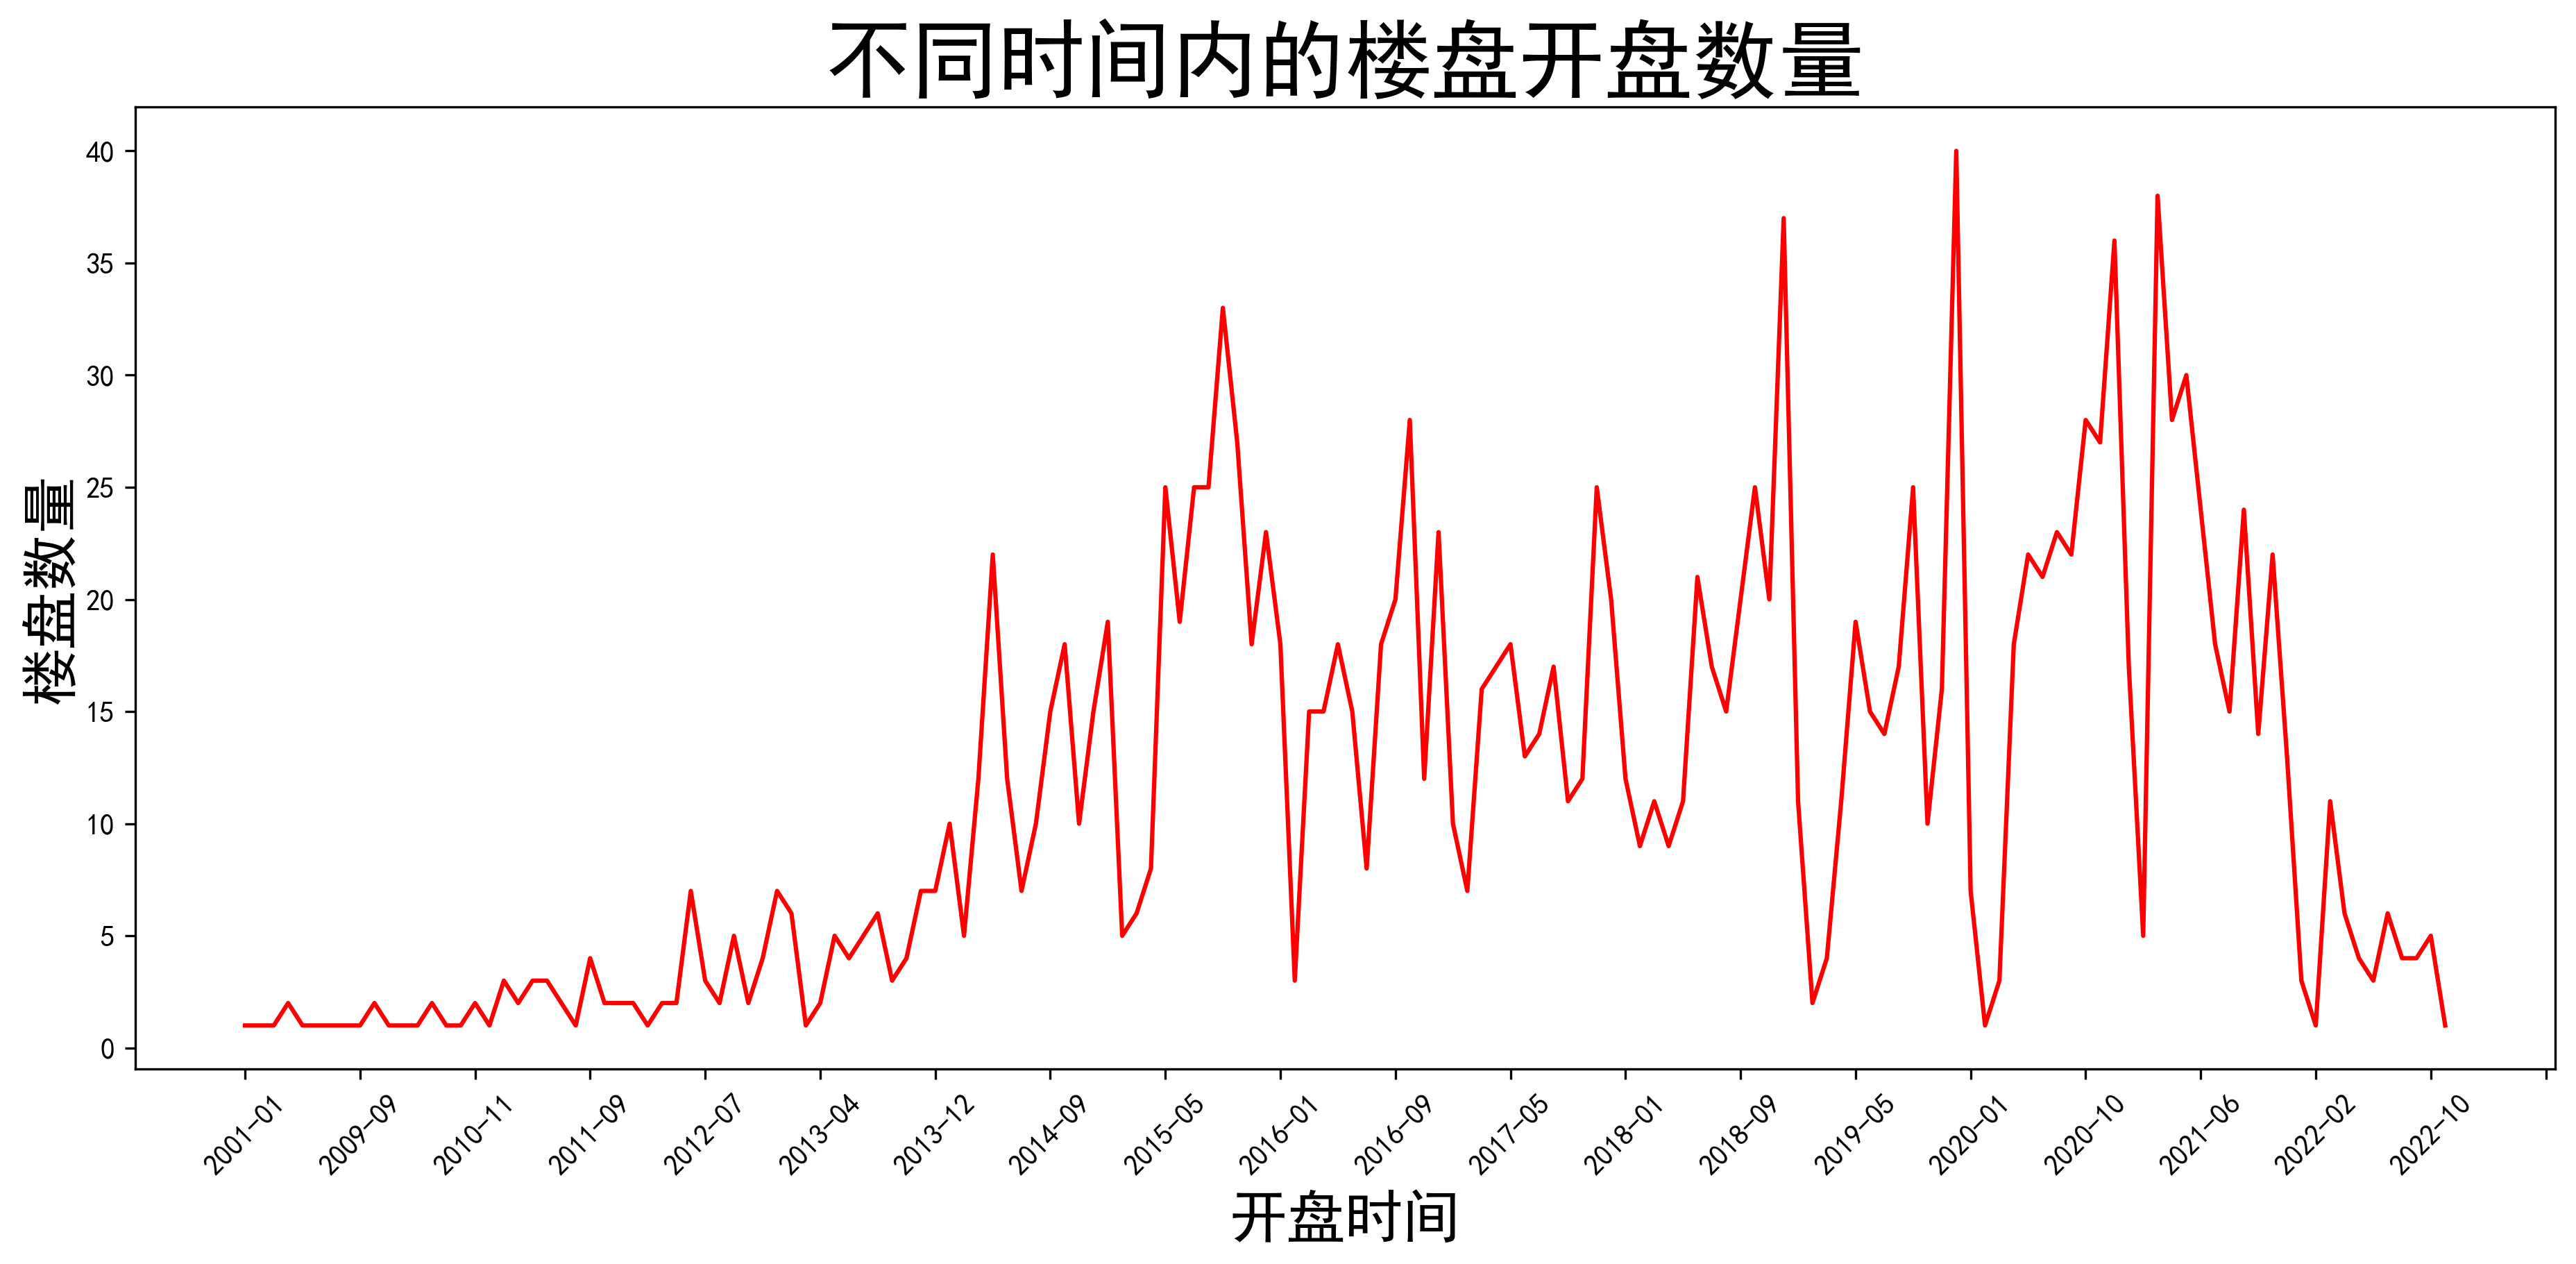

In [84]:
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使图形中的中文正常编码显示
plt.rcParams['axes.unicode_minus'] = False  #  使坐标轴刻度表签正常显示正负号
plt.figure(figsize = (15,6), dpi = 300)  # 定义画布
x = time_all
y = title
plt.xticks(rotation = 45)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(8))
plt.xlabel("开盘时间", fontsize = 20)
plt.ylabel("楼盘数量", fontsize = 20)
plt.title("不同时间内的楼盘开盘数量", fontsize = 30)
plt.plot(x, y, color = 'red')
plt.show()